根據使用者的篩選條件:  
貓星人(寵物)
pet

---

11公路: 標準 : 步行15分鐘內  
201 1000  
202 1000  
203 1000  
204 1000  

---

吃貨  
101 300  
102 2100  

---

4運動達人  
402 1300  
403 1400  

---

5購物文青  
301 2400  
302 1200  
303 4800  
304 4100  
305 2200  

---

6安居  
501  4000  
502  5800  
504  6000  
505  6000  

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

import json
import numpy as np
import pandas as pd

from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KDTree
#latlng => TWD97
from LatLonToTWD97 import LatLonToTWD97
c = LatLonToTWD97()

with open('./data/typeid.json') as f:
    typeid = json.load(f)
with open('./data/bw_result.json') as f:
    typebw = json.load(f)
rentdf = pd.read_csv('./data/clear_rent_items.csv')
envdf = pd.read_csv('./data/clear_env_items.csv')

In [134]:
typeid

{'101': 'Food',
 '102': 'Supermarket',
 '201': 'Bus',
 '202': 'MRT',
 '203': 'UBike',
 '204': 'Train',
 '205': 'Exam',
 '206': 'Charger',
 '207': 'Towing',
 '301': 'BookStore',
 '302': 'DepartmentStore',
 '303': 'Library',
 '304': 'Museum',
 '305': 'Theater',
 '401': 'Park',
 '402': 'Scenic',
 '403': 'Sport',
 '501': 'School',
 '502': 'Hospital',
 '503': 'Pharmacy',
 '504': 'Police',
 '505': 'FireStation'}

In [3]:
%%time
#用KDE計算各類別分數
rentdata = list(map(c.convert,rentdf.loc[:,['lat','lng']].values))
col = '{}:{}'
kdtree = {}
kdedf = pd.DataFrame()
for key, value in typeid.items():
    name = col.format(key,typeid[key])
    bw = int(typebw[key])
    data = list(map(c.convert,envdf[envdf.typeID==int(key)].loc[:,['lat','lng']].values))
    kdtree[key] = KDTree(data)
    kde = KernelDensity(bandwidth=bw)
    kde.fit(data)
    kdedf[name] = kde.score_samples(rentdata)

CPU times: user 1min 3s, sys: 50.6 ms, total: 1min 3s
Wall time: 1min 3s


In [ ]:
expkdedf = kdedf.apply(np.exp)

In [153]:
expkdedf.columns

Index(['101:Food', '102:Supermarket', '201:Bus', '202:MRT', '203:UBike',
       '204:Train', '205:Exam', '206:Charger', '207:Towing', '301:BookStore',
       '302:DepartmentStore', '303:Library', '304:Museum', '305:Theater',
       '401:Park', '402:Scenic', '403:Sport', '501:School', '502:Hospital',
       '503:Pharmacy', '504:Police', '505:FireStation'],
      dtype='object')

In [4]:
%%time
#使用bandwidth當作半徑計算個數
col = '{}:{}'
countdf = pd.DataFrame()
for key, value in typeid.items():
    name = col.format(key,typeid[key])
    bw = int(typebw[key])
    countdf[name] = kdtree[key].query_radius(rentdata,r=bw, count_only=True)

CPU times: user 1.11 s, sys: 997 µs, total: 1.11 s
Wall time: 1.11 s


In [135]:
from sklearn.preprocessing import LabelEncoder
#pet
le = LabelEncoder()
le.fit(rentdf.pet)

LabelEncoder()

In [136]:
le.classes_

array(['N', 'Y'], dtype=object)

In [130]:
tagdf = pd.DataFrame()

In [131]:
tagdf['tag:pet'] = le.transform(rentdf.pet)

In [112]:
#convienence transport
trans = {'201':800,'202':800,'203':800}
col = '{}:{}'
trans_df = pd.DataFrame()
for key, value in trans.items():
    name = col.format(key,typeid[key])
    bw = value
    trans_df[name] = kdtree[key].query_radius(rentdata,r=bw, count_only=True)

In [137]:
rentdf['transport'] = (trans_df>0).T.sum()

In [139]:
rentdf.groupby('transport').count().ID

transport
0      193
1      887
2     6343
3    13325
Name: ID, dtype: int64

In [140]:
#交通便利
tagdf['tag:transport'] = rentdf.transport>2

In [143]:
#小資
tagdf['tag:capital'] = rentdf.rent<rentdf.rent.quantile(0.25)

In [152]:
#家庭
tagdf['tag:home'] = rentdf.label == '住'

In [158]:
#4運動達人
expkdedf.loc[:,['402:Scenic','403:Sport']]

,402:Scenic,403:Sport
0,3.308031e-09,1.435538e-09
1,6.075340e-10,3.659256e-10
2,1.921770e-09,1.099028e-09
3,4.294840e-09,1.484730e-09
4,4.415774e-11,5.796464e-10
5,3.775529e-09,1.423186e-09
6,2.551302e-09,1.322928e-09
7,2.504979e-10,4.099936e-10
8,4.349059e-10,5.044851e-10
9,9.245710e-10,7.344313e-10


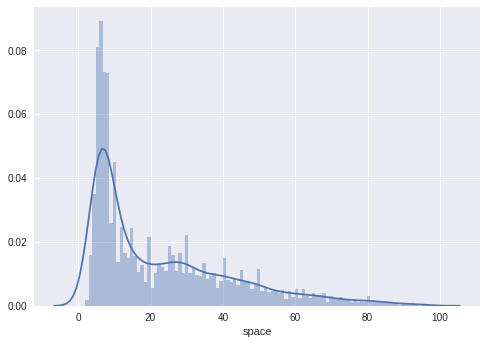

In [93]:
sns.distplot(rentdf.space, bins=100)

In [129]:
rentdf.head()

,ID,cityID,pet,rent,space,lat,lng,label,floor,unit,label:pet,transport,tag:transport,tag:pet
0,1,251,N,25000,62.34,25.181837,121.440487,住,5,401.026628,0,2,False,0
1,2,251,N,32000,50.70,25.197719,121.421685,住,2,631.163708,0,1,False,0
2,3,251,N,25000,44.97,25.178503,121.454991,住,9,555.926173,0,2,False,0
3,4,251,N,5000,7.00,25.170918,121.441836,套,4,714.285714,0,3,True,0
4,5,239,N,6000,7.99,24.974047,121.327134,套,3,750.938673,0,0,False,0
